In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
from brdfAnalysisLib import *
import pickle
import temp_2_radiance as t2r
from joblib import Parallel, delayed
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [4]:
thetas_i = np.arange(1, 91, 1)[::-1]
thetas_i_rad = np.deg2rad(thetas_i)
thetas_o = np.array([15, 20, 30, 40, 45, 50, 60, 70, 80, 85])
thetas_o_rad = np.deg2rad(thetas_o)


def get_brdf(radiance, theta_o):
    Omega_i = np.pi * 5**2 / 315**2
    L_i_det = 3463.9861420900456 # Full width at half maximum (FWHM) des Strahlers
    return radiance * np.cos(theta_o) / (L_i_det * np.cos(thetas_i_rad) * Omega_i)

with open(r"\\mrt-pc1\mrt\Forschung\03_Projekte_laufende\517_e-BRDF_WiVoPro\11_Projektinhalte\05_Messungen\JSSS_MWIR_BRDF\Processed\data.pkl", "rb") as handle:
    Reflections = pickle.load(handle)
    
names = list(Reflections.keys())
names

['Alu eloxiert',
 'Alu',
 'Alu geschliffen',
 'Alu sandgestrahlt',
 'Edelstahl',
 'Edelstahl gebürstet',
 'Kupfer',
 'Referenzlack (Glatt)',
 'Referenzlack (Rau)',
 'Stahl sandgestrahlt',
 'Verzinkter Stahl',
 'Messing']

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


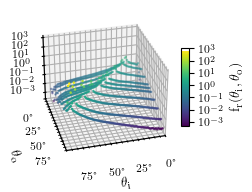

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


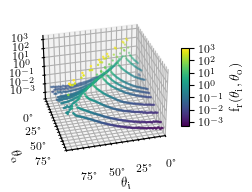

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


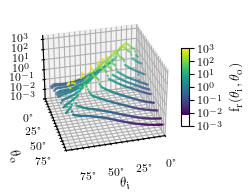

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


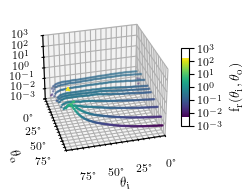

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


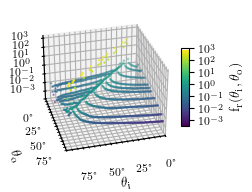

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


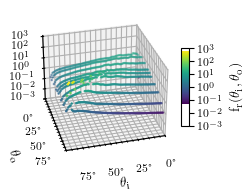

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


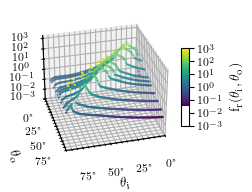

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


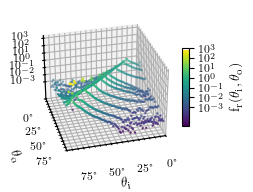

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


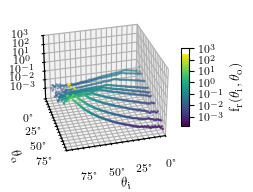

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


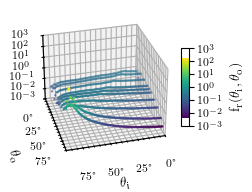

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


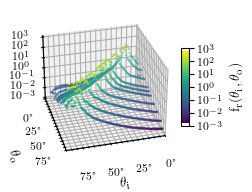

C:\Users\noori\AppData\Local\Temp\ipykernel_19924\2043131004.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


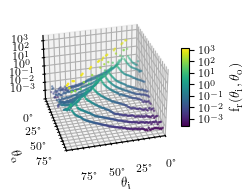

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import FuncFormatter

for j in range(len(names)):
    radiance = Reflections[names[j]]['L_o']
    brdf = get_brdf(radiance, thetas_o_rad.reshape(-1, 1))

    brdf = brdf[:, 3:]

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=set_size(235.54))
    ax.view_init(elev=30, azim=75)
    X, Y = np.meshgrid(thetas_i[3:], thetas_o)
    Z = np.log10(brdf)

    surf1 = ax.scatter(X, Y, Z, c=Z, cmap='viridis', linewidth=0.8, s=1)
    
    log_ticks = np.log10([1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
    log_tick_labels = [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$']
    ax.set_zticks(log_ticks)
    ax.set_zticklabels(log_tick_labels)
    ax.set_ylabel(r'$\theta_\mathrm{o}$')
    ax.set_xlabel(r'$\theta_\mathrm{i}$', labelpad=-2)
    ax.set_xlim(0, 90)
    ax.set_ylim(0, 90)
    x_labels = ['{}^°'.format(th) for th in ax.get_xticklabels()]

    # Add a color bar which maps values to colors.
    cb = fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=10, pad=0.01)
    cb.set_label(r'$\mathrm{f}_\mathrm{r}(\theta_\mathrm{i}, \theta_\mathrm{o})$')
    cb.set_ticks(log_ticks)
    cb.set_ticklabels(log_tick_labels)

    def degree_formatter(x, pos):
        return f"{int(x)}°"

    plt.gca().xaxis.set_major_formatter(FuncFormatter(degree_formatter))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(degree_formatter))

    plt.minorticks_on()
    plt.grid(alpha=0.3)
    plt.grid(which='minor', alpha=0.1)
    plt.tight_layout()
    plt.savefig('{}.pdf'.format(names[j]), bbox_inches='tight')
    plt.show()

In [6]:
import pandas as pd
names = ['Alu', 'Edelstahl gebürstet', 'Referenzlack (Glatt)', 'Alu sandgestrahlt', 'Stahl sandgestrahlt', 
         'Verzinkter Stahl', 'Alu eloxiert', 'Alu geschliffen', 'Edelstahl', 'Messing', 'Kupfer', 'Referenzlack (Rau)']

with open(r"\\mrt-pc1\mrt\Forschung\03_Projekte_laufende\517_e-BRDF_WiVoPro\11_Projektinhalte\05_Messungen\JSSS_MWIR_BRDF\Processed\emissionsgrade_unsicherheit.pkl", "rb") as handle:
    ground_truth_emissivity = pickle.load(handle)
    
def e_Ldet(Ls, Lamb):
    return np.abs(1 / (Ls - Lamb))

def e_Ls(Ldet, Lamb, Ls):
    return np.abs((Lamb-Ldet) / (Ls - Lamb)**2)

def e_Lamb(Ldet, Lamb, Ls):
    return np.abs((Lamb - Ldet) / (Ls - Lamb)**2)


bb_temp = 40 + 273.15

amb_temp = 19 + 273.15

uncertainty = {}
for i in range(len(names)):
    df = pd.read_excel(r"\\mrt-pc1\mrt\Forschung\03_Projekte_laufende\517_e-BRDF_WiVoPro\11_Projektinhalte\05_Messungen\JSSS_MWIR_BRDF\Processed\2025_03_10_MWIR_Messungen.xlsx", sheet_name=names[i])

    u_Ldet = ground_truth_emissivity[names[i]]['vareps std']
    u_Ls = t2r.get_radiance(273.15 + 40 + 1.5, 2e-6, 5.7e-6, 1000) - t2r.get_radiance(273.15 + 40, 2e-6, 5.7e-6, 1000)
    
    
    amb_temp = df['Umgebungstemperatur'][0] + 273.15
    u_Lamb = 0.018
    
    T_det_K = (df['Scheintemperatur MWIR'].to_numpy() + 273.15)[-1]
    L_det = t2r.get_radiance(T_det_K, 2e-6, 5.7e-6, 1000)
    L_bb = t2r.get_radiance(bb_temp, 2e-6, 5.7e-6, 1000)
    L_amb = t2r.get_radiance(amb_temp, 2e-6, 5.7e-6, 1000)
    
    der_Ldet = e_Ldet(L_bb, L_amb)
    der_Ls = e_Ls(L_det, L_amb, L_bb)
    der_Lamb = e_Lamb(L_det, L_amb, L_bb)
    
    u_em_2 = u_Ldet**2 * der_Ldet**2 + u_Ls**2 * der_Ls**2 + u_Lamb**2 * der_Lamb**2
    u_em = np.sqrt(u_em_2)
    
    uncertainty[names[i]] = u_em
    print(names[i], np.round(u_em[-1], 2))


C:\Users\noori\AppData\Local\Temp\ipykernel_19924\3127202828.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  ground_truth_emissivity = pickle.load(handle)


Alu 0.01
Edelstahl gebürstet 0.03
Referenzlack (Glatt) 0.09
Alu sandgestrahlt 0.04
Stahl sandgestrahlt 0.03
Verzinkter Stahl 0.01
Alu eloxiert 0.05
Alu geschliffen 0.02
Edelstahl 0.03
Messing 0.01
Kupfer 0.01
Referenzlack (Rau) 0.09


C:\Users\noori\AppData\Local\Temp\ipykernel_19924\1033228129.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  R_in_plane = np.trapz(brdf*np.cos(thetas_i_rad[1:])*np.sin(thetas_i_rad[1:]), dx=h) * 2 * np.pi


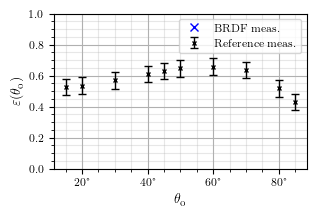

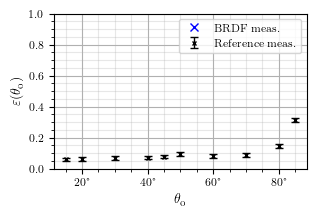

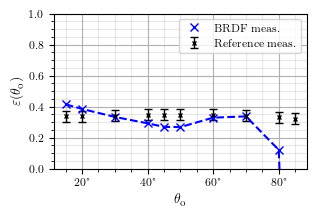

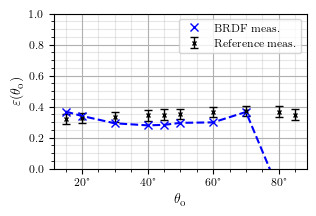

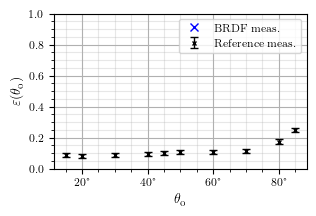

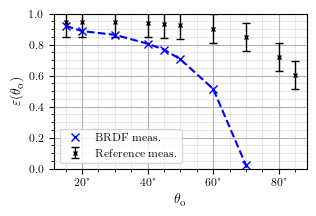

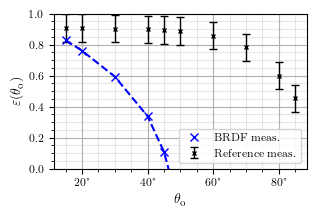

In [7]:
# Emissivity
        
names = ['Alu eloxiert', 'Alu', 'Alu sandgestrahlt', 'Stahl sandgestrahlt', 'Verzinkter Stahl', 'Referenzlack (Rau)', 'Referenzlack (Glatt)']
for j in range(len(names)):
    radiance = Reflections[names[j]]['L_o']
    brdf = get_brdf(radiance, thetas_o_rad.reshape(-1, 1))
    brdf = brdf[:, 1:]
    h = thetas_i_rad[0] - thetas_i_rad[1]

    R_in_plane = np.trapz(brdf*np.cos(thetas_i_rad[1:])*np.sin(thetas_i_rad[1:]), dx=h) * 2 * np.pi
    predicted_em = 1 - R_in_plane

    truth = ground_truth_emissivity[names[j]]

    plt.figure(figsize=set_size(235.43))
    plt.errorbar(truth['Kamerawinkel'], truth['vareps mean'], yerr=uncertainty[names[j]], fmt='kx', elinewidth=1, capsize=3, markersize=3, label='Reference meas.')
    plt.plot(thetas_o, predicted_em, 'b--')
    plt.plot(thetas_o, predicted_em, 'bx', label='BRDF meas.')
    plt.xlabel(r'$\theta_\mathrm{o}$')
    plt.ylabel(r'$\varepsilon(\theta_\mathrm{o})$')
    def degree_formatter(x, pos):
        return f"{int(x)}°"

    plt.gca().xaxis.set_major_formatter(FuncFormatter(degree_formatter))
    plt.minorticks_on()
    plt.grid(which='minor', alpha=0.3)
    plt.ylim(0, 1)
    plt.grid()
    plt.legend()
    plt.savefig(r'Em_{}.pdf'.format(names[j]), bbox_inches='tight')
    plt.show()